In [27]:
import pandas as pd

#Create a DataFrame containing the data you wish to analyze.
df = pd.read_csv(
    filepath_or_buffer='example_data.csv', 
    header=None, 
    sep=',')

df = df.transpose()

df.rows=['Linearity', 'Products & Markets', 'Software Design', 'Mechanics']

df

,0,1,2,3,4,5,6,7
0,8.0,9.0,6.0,8.0,6.0,6.0,15.0,4.0
1,2.5,6.0,2.0,8.0,2.0,2.0,8.0,9.0
2,20.0,10.0,5.0,8.0,6.0,6.0,13.0,6.5
3,6.5,5.0,4.0,3.0,6.0,5.0,8.5,6.5


In [29]:
import numpy as np

#Turn the data into a numpy matrix.
x = np.matrix(df.iloc[:,0:8].values.reshape((4, 8)))

#Find the average amount of time spent on each class
x.mean(1)

#Find the standard deviation by class in this example.
x.std(1, ddof=1)
#ddof means Delta Degrees of Freedom

matrix([[3.32737563],
        [3.12178406],
        [5.04931042],
        [1.69952725]])

In [32]:
#Show another way to get a Numpy representation of a Dataframe
X = df.iloc[:,0:8].values
print(X)

[[ 8.   9.   6.   8.   6.   6.  15.   4. ]
 [ 2.5  6.   2.   8.   2.   2.   8.   9. ]
 [20.  10.   5.   8.   6.   6.  13.   6.5]
 [ 6.5  5.   4.   3.   6.   5.   8.5  6.5]]


In [13]:
print(np.std([  8.,  9.  ,  6. ,   8.  ,  6.  ,  6.  , 15.   , 4. ]))

3.112474899497183


In [44]:
from sklearn.preprocessing import StandardScaler
#Center the transpose of the data matrix.
#In other words, center the rows of the data matrix
X_std = StandardScaler(copy=True, with_mean=True, with_std=False).fit_transform(X.T)
#Get the centered data matrix
X_std = X_std.T

In [45]:
print(X_std)

[[ 0.25    1.25   -1.75    0.25   -1.75   -1.75    7.25   -3.75  ]
 [-2.4375  1.0625 -2.9375  3.0625 -2.9375 -2.9375  3.0625  4.0625]
 [10.6875  0.6875 -4.3125 -1.3125 -3.3125 -3.3125  3.6875 -2.8125]
 [ 0.9375 -0.5625 -1.5625 -2.5625  0.4375 -0.5625  2.9375  0.9375]]


In [46]:
print(x.std(1, ddof=1))

[[3.32737563]
 [3.12178406]
 [5.04931042]
 [1.69952725]]


In [66]:
#Divide each entry in the data matrix by the standard deviation of the samples in that row.
X_std2 = X_std/x.std(1, ddof=1)
X_std2

matrix([[ 0.07513429,  0.37567144, -0.52594002,  0.07513429, -0.52594002,
         -0.52594002,  2.17889436, -1.12701433],
        [-0.78080353,  0.34035025, -0.94096835,  0.98100956, -0.94096835,
         -0.94096835,  0.98100956,  1.30133921],
        [ 2.11662566,  0.13615721, -0.85407702, -0.25993648, -0.65603018,
         -0.65603018,  0.73029774, -0.55700675],
        [ 0.55162399, -0.33097439, -0.91937332, -1.50777224,  0.25742453,
         -0.33097439,  1.72842184,  0.55162399]])

In [51]:
# #Transpose the matrix so each variable is a column vector.
# X_std2 = X_std2.T
# X_std2

matrix([[ 0.07513429, -0.78080353,  2.11662566,  0.55162399],
        [ 0.37567144,  0.34035025,  0.13615721, -0.33097439],
        [-0.52594002, -0.94096835, -0.85407702, -0.91937332],
        [ 0.07513429,  0.98100956, -0.25993648, -1.50777224],
        [-0.52594002, -0.94096835, -0.65603018,  0.25742453],
        [-0.52594002, -0.94096835, -0.65603018, -0.33097439],
        [ 2.17889436,  0.98100956,  0.73029774,  1.72842184],
        [-1.12701433,  1.30133921, -0.55700675,  0.55162399]])

In [67]:
mean_vec = np.mean(X_std2, axis=1)
print('The centered, standardized mean time each person works outside of classes:')
print(mean_vec)
print()
print('The centered matrix:')
print(X_std2)
print()
print('The number of dimensions of the centered matrix:')
print((X_std2.shape[1]))

The centered, standardized mean time each person works outside of classes:
[[ 0.00000000e+00]
 [-1.38777878e-17]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]

The centered matrix:
[[ 0.07513429  0.37567144 -0.52594002  0.07513429 -0.52594002 -0.52594002
   2.17889436 -1.12701433]
 [-0.78080353  0.34035025 -0.94096835  0.98100956 -0.94096835 -0.94096835
   0.98100956  1.30133921]
 [ 2.11662566  0.13615721 -0.85407702 -0.25993648 -0.65603018 -0.65603018
   0.73029774 -0.55700675]
 [ 0.55162399 -0.33097439 -0.91937332 -1.50777224  0.25742453 -0.33097439
   1.72842184  0.55162399]]

The number of dimensions of the centered matrix:
8


In [68]:
#Next, we must create the covariance matrix.
cov_mat = (X_std2).dot((X_std2).T) / (X_std2.shape[1]-1)
print('Covariance matrix: \n%s' %cov_mat.round(3))

Covariance matrix: 
[[1.    0.328 0.507 0.496]
 [0.328 1.    0.024 0.189]
 [0.507 0.024 1.    0.472]
 [0.496 0.189 0.472 1.   ]]


In [69]:
#Find the eigenvectors and eigenvalues of the covariance matrix.
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs.round(2))
print('\nEigenvalues \n%s' %eig_vals.round(2))

Eigenvectors 
[[ 0.59  0.72  0.36  0.09]
 [ 0.29 -0.37  0.06  0.88]
 [ 0.52 -0.59  0.43 -0.44]
 [ 0.55 -0.02 -0.83 -0.13]]

Eigenvalues 
[2.08 0.41 0.52 0.99]


In [75]:
#Perform singular value decomposition on the centered matrix
u,s,v = np.linalg.svd(X_std2)
u.round(2)

array([[-0.59,  0.09, -0.36,  0.72],
       [-0.29,  0.88, -0.06, -0.37],
       [-0.52, -0.44, -0.43, -0.59],
       [-0.55, -0.13,  0.83, -0.02]])

In [76]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [79]:
#Principal Component Analysis
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0].round(2))
    print(i[1].round(2))

Eigenvalues in descending order:
2.08
[[0.59]
 [0.29]
 [0.52]
 [0.55]]
0.99
[[ 0.09]
 [ 0.88]
 [-0.44]
 [-0.13]]
0.52
[[ 0.36]
 [ 0.06]
 [ 0.43]
 [-0.83]]
0.41
[[ 0.72]
 [-0.37]
 [-0.59]
 [-0.02]]


In [92]:
#Singular Value Decomposition
# Make a list of (singular value, eigenvector) tuples
eig_pairs2 = [(np.abs(s[i]), u[:,i]) for i in range(len(s))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs2.sort()
eig_pairs2.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Singular values in descending order:')
for i in eig_pairs2:
    print(i[0].round(2))
    print(i[1].round(2))

Singular values in descending order:
3.81
[[-0.59]
 [-0.29]
 [-0.52]
 [-0.55]]
2.64
[[ 0.09]
 [ 0.88]
 [-0.44]
 [-0.13]]
1.91
[[-0.36]
 [-0.06]
 [-0.43]
 [ 0.83]]
1.69
[[ 0.72]
 [-0.37]
 [-0.59]
 [-0.02]]


In [93]:
v.T.round(2)

array([[-0.32, -0.05,  0.4 ,  0.17,  0.2 ,  0.29, -0.76,  0.07],
       [-0.64,  0.12, -0.14,  0.45, -0.23, -0.21,  0.19,  0.46],
       [-0.23, -0.25, -0.08, -0.64,  0.39,  0.13,  0.14,  0.54],
       [-0.54,  0.04,  0.29, -0.08,  0.21,  0.21,  0.44, -0.58],
       [ 0.15,  0.32, -0.19,  0.37,  0.83, -0.13,  0.07,  0.04],
       [ 0.12,  0.34, -0.23,  0.11, -0.14,  0.86,  0.13,  0.16],
       [-0.05, -0.78, -0.45,  0.33,  0.1 ,  0.2 , -0.01, -0.18],
       [ 0.32, -0.31,  0.66,  0.33,  0.04,  0.11,  0.39,  0.32]])

In [96]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username='softdesinfinity2', api_key='rVvqvP7LcJ9vC1WAixOv')

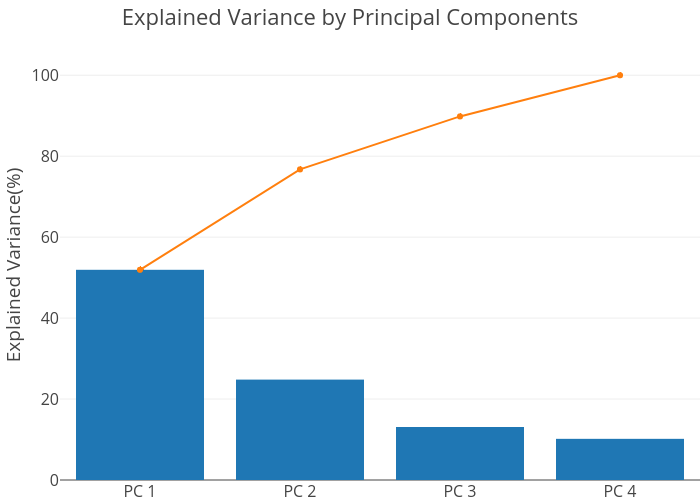

In [97]:
#Format a plot to show how much of the total variance each principal component explains.

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,18)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,18)], 
        y=cum_var_exp,
        showlegend=False)

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained Variance(%)'),
        title='Explained Variance by Principal Components',
        margin=dict(t=50, b=20, r=0, l=60, autoexpand=False),
        font=dict(size=16)
        )

fig = Figure(data=data, layout=layout)

py.image.save_as(fig, filename='Ex_var.png')

from IPython.display import Image
Image('Ex_var.png')

In [102]:
#Using PCA
#Creates a matrix containing the two dominant eigenvectors as column vectors.
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w.round(2))

Matrix W:
 [[ 0.59  0.09]
 [ 0.29  0.88]
 [ 0.52 -0.44]
 [ 0.55 -0.13]]


In [103]:
#Using SVD
#Creates a matrix containing the two dominant eigenvectors as column vectors.
matrix_w2 = np.hstack((eig_pairs2[0][1].reshape(4,1), 
                      eig_pairs2[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w2)

Matrix W:
 [[-0.58595496  0.0875778 ]
 [-0.28674255  0.88206604]
 [-0.52259242 -0.44376272]
 [-0.54893776 -0.13177356]]


In [106]:
#Using PCA
#Dimensionally reduce the data matrix
Y = X_std2.T.dot(matrix_w)
print(Y)

[[ 1.22907548 -1.69410919]
 [ 0.20718982  0.31630406]
 [-1.52900573 -0.37590027]
 [-0.63819146  1.18592995]
 [-0.77951918 -0.61885692]
 [-1.10251356 -0.5413215 ]
 [ 2.88847521  0.5042988 ]
 [-0.27551058  1.22365507]]


In [107]:
#Using SVD
#Dimensionally reduce the data matrix
Y2 = X_std2.T.dot(matrix_w2)
print(Y2)

[[-1.22907548 -1.69410919]
 [-0.20718982  0.31630406]
 [ 1.52900573 -0.37590027]
 [ 0.63819146  1.18592995]
 [ 0.77951918 -0.61885692]
 [ 1.10251356 -0.5413215 ]
 [-2.88847521  0.5042988 ]
 [ 0.27551058  1.22365507]]


In [108]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.4.1


In [109]:
init_notebook_mode(connected=True)

In [110]:
#Plot the two dominant principal components from PCA
import plotly.graph_objs as go

traces = []

trace1 = go.Scatter(
    x=Y[:,0],
    y=Y[:,1],
    mode='markers+text',
    text=['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley'],
    textposition='bottom',
    marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))

traces.append(trace1)


data = Data(traces)

layout = Layout(showlegend=False,
                xaxis=dict(title='PC1 of C',),
                yaxis=dict(title='PC2 of C',),
                title='2D PCA of Class Time Data',
                margin=dict(t=50, b=50, r=0, l=60, autoexpand=False),
                font=dict(size=16)
                )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='2d-PCA')

In [114]:
#Plot the two dominant singular values from SVD
import plotly.graph_objs as go

traces = []

trace1 = go.Scatter(
    x=Y2[:,0],
    y=Y2[:,1],
    mode='markers+text',
    text=['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley'],
    textposition='bottom',
    marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))

traces.append(trace1)


data = Data(traces)

layout = Layout(showlegend=False,
                xaxis=dict(title='PC1 of U',),
                yaxis=dict(title='PC2 of U',),
                title='2D SVD of Class Time Data',
                margin=dict(t=50, b=50, r=0, l=60, autoexpand=False),
                font=dict(size=16)
                )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='2d-SVD')